 `DOG - CAT CLASSIFIER (CNN) `

# Convolution Neural Network

### Importing the libraries

In [43]:
import numpy as np
import tensorflow as tf
import PIL.Image as Image
import os
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.14.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [44]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    brightness_range=(0.5,1.5),
)

training_set = train_datagen.flow_from_directory(
    'dog_cat_dataset/training_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary', 
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [45]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'dog_cat_dataset/test_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary', 
)

Found 2000 images belonging to 2 classes.


## PART 2 - Building the CNN 
`(Build the brain along with the eye for the machine `

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

### Initialising the CNN

In [47]:
cnn = Sequential()

### Step 1 - Convolution 

In [48]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

### Step 2 - Pooling 

In [49]:
cnn.add(MaxPooling2D( pool_size=(2, 2), strides=2))

#### Adding a seccond convolution layer

In [50]:
cnn.add(Conv2D(filters=32,kernel_size=3, activation='relu') )
cnn.add(MaxPooling2D( pool_size=(2, 2), strides=2))        

### Step 3 - Flattering

In [51]:
cnn.add(Flatten())
cnn.output_shape

(None, 6272)

### Step 4 - Full Connection

In [52]:
cnn.add(Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [53]:
cnn.add(Dense(units=1, activation='sigmoid'))

## PART 3 - Training the CNN  
`Make the brain smart in other to recognize image`

### Compling the CNN

In [54]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

In [55]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

### Training theh CNN on the Training set and Evaluating it on the Test set

In [17]:
%%timeit -n1 -r1
cnn.fit(x =training_set, validation_data=test_set, epochs=25,)

Epoch 1/25
250/250 [==============================] - 172s 681ms/step - loss: 0.6732 - accuracy: 0.5840 - val_loss: 0.6822 - val_accuracy: 0.5640
Epoch 2/25
250/250 [==============================] - 79s 315ms/step - loss: 0.6106 - accuracy: 0.6671 - val_loss: 0.5858 - val_accuracy: 0.6890
Epoch 3/25
250/250 [==============================] - 79s 317ms/step - loss: 0.5635 - accuracy: 0.7166 - val_loss: 0.6948 - val_accuracy: 0.6460
Epoch 4/25
250/250 [==============================] - 80s 319ms/step - loss: 0.5335 - accuracy: 0.7387 - val_loss: 0.4992 - val_accuracy: 0.7575
Epoch 5/25
250/250 [==============================] - 82s 330ms/step - loss: 0.4967 - accuracy: 0.7630 - val_loss: 0.4745 - val_accuracy: 0.7770
Epoch 6/25
250/250 [==============================] - 89s 355ms/step - loss: 0.4926 - accuracy: 0.7609 - val_loss: 0.4667 - val_accuracy: 0.7900
Epoch 7/25
250/250 [==============================] - 91s 365ms/step - loss: 0.4718 - accuracy: 0.7740 - val_loss: 0.4601 - val_a

## Part 4 - Making a single prediction

In [39]:
from keras.preprocessing import image
pred_img ='small+white+fluffy.jpg'
pred_img ='catt.jpg'
pred_img ='Cat_August_2010-4.jpg'
pred_img ='German-Shepherd.png'
test_image = image.load_img('dog_cat_dataset/'+pred_img, target_size=(64, 64))
test_image = image.img_to_array(test_image )
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 297ms/step


In [40]:
training_set.class_indices
print(result)
if result [0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
prediction    

[[1.]]


'dog'

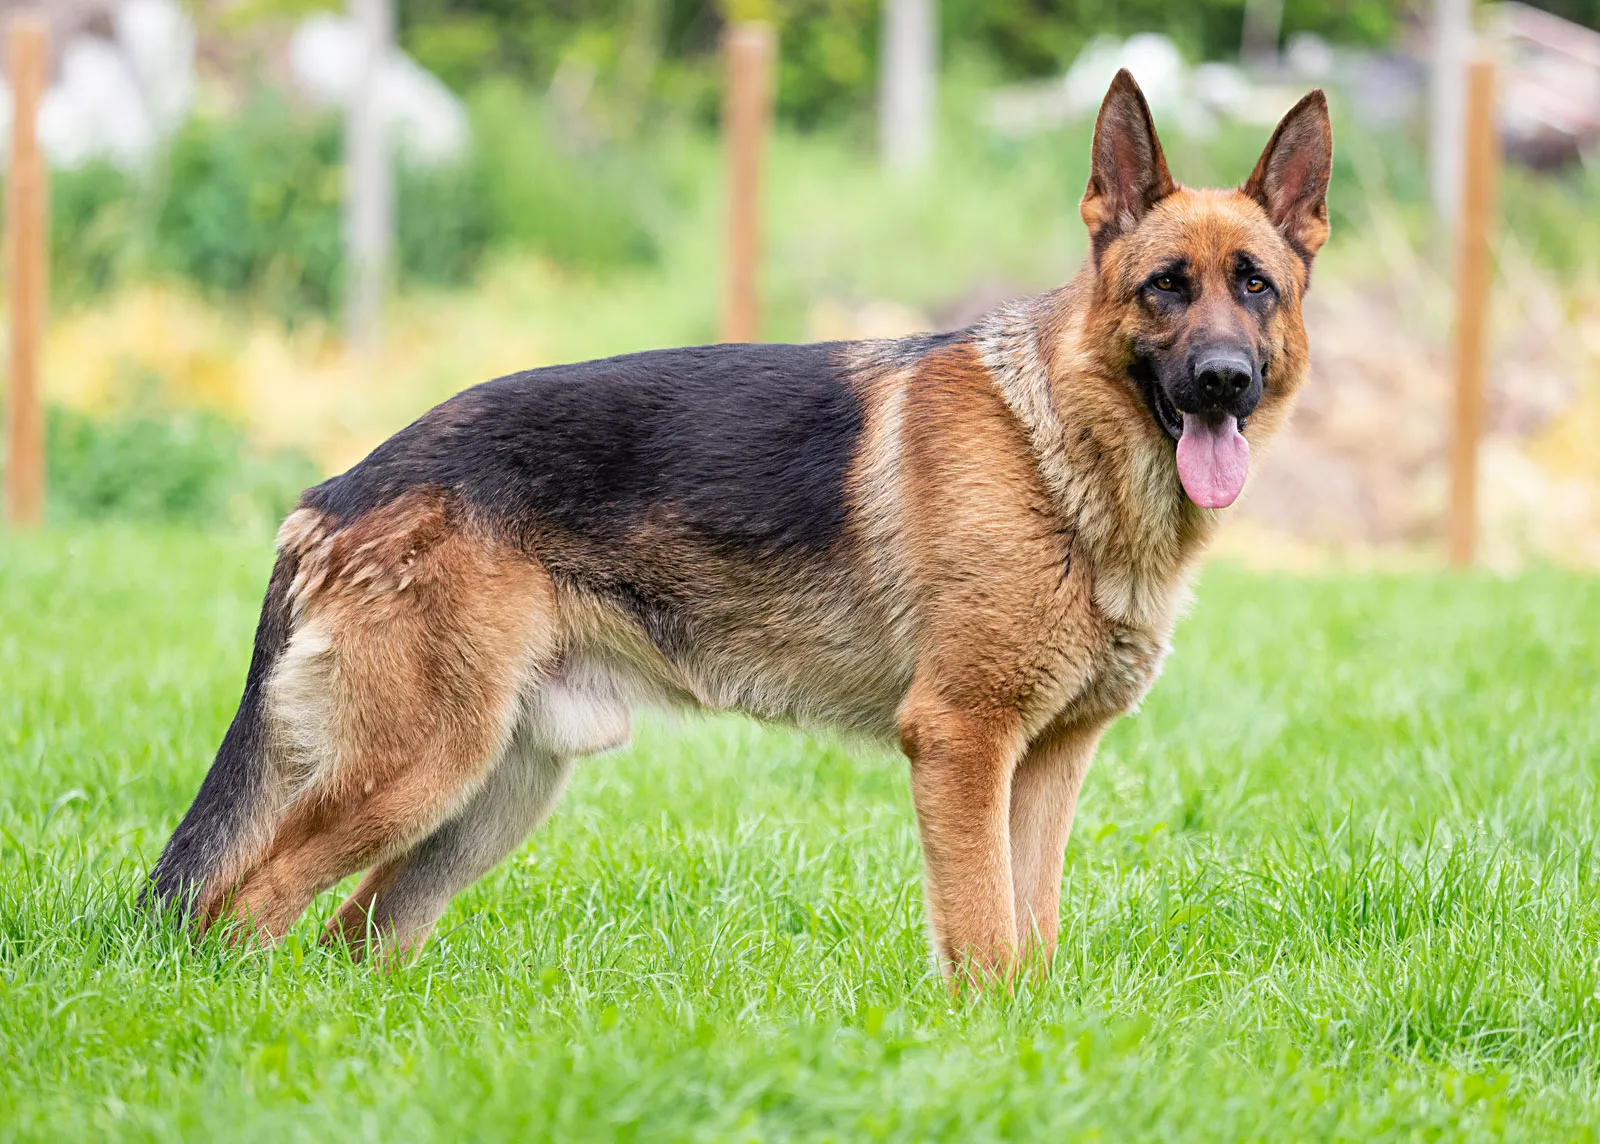

In [41]:
#Image.open(os.path.join(data_dir, 'images3.jpeg'))
#Image.open(pathdir_img)
Image.open(os.path.join('dog_cat_dataset', pred_img))